# Taxi Fare dataset -> Taxi_Fare amount 
## Its Regression Problem
### wher dependent variable is numeric and its continuous and infinite so that we have to use LinearRegression 

### here data_time_of_pickup is a object variable and i think it's not useful 
### also given that longitude_of_pickup and latitude_of_pickup is 0 that place is located in ocean so it's not real data so we remove it by condition

### import all required libries

In [173]:
#import all required libries

##Basic and most important libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Classifiers
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

#Data Processing Function

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

### Loading the dataset

In [174]:
url = ('https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv')
df= pd.read_csv(url)

In [175]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


### Data Preparation

In [176]:
df.shape

(50000, 8)

In [177]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [178]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
amount,50000.0,11.364171,9.685557,-5.000000,6.000000,8.500000,12.500000,200.000000
longitude_of_pickup,50000.0,-72.509756,10.393860,-75.423848,-73.992062,-73.981840,-73.967148,40.783472
latitude_of_pickup,50000.0,39.933759,6.224857,-74.006893,40.734880,40.752678,40.767360,401.083332
longitude_of_dropoff,50000.0,-72.504616,10.407570,-84.654241,-73.991152,-73.980082,-73.963584,40.851027
latitude_of_dropoff,50000.0,39.926251,6.014737,-74.006377,40.734372,40.753372,40.768167,43.415190
no_of_passenger,50000.0,1.667840,1.289195,0.000000,1.000000,1.000000,2.000000,6.000000


In [113]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
unique_id,50000,3597,26:00.0,457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,50000.0,NaN,NaN,NaN,11.364171,9.685557,-5.0,6.0,8.5,12.5,200.0
date_time_of_pickup,50000,49555,2011-09-03 01:30:00 UTC,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude_of_pickup,50000.0,NaN,NaN,NaN,-72.509756,10.39386,-75.423848,-73.992062,-73.98184,-73.967148,40.783472
latitude_of_pickup,50000.0,NaN,NaN,NaN,39.933759,6.224857,-74.006893,40.73488,40.752678,40.76736,401.083332
longitude_of_dropoff,50000.0,NaN,NaN,NaN,-72.504616,10.40757,-84.654241,-73.991152,-73.980082,-73.963584,40.851027
latitude_of_dropoff,50000.0,NaN,NaN,NaN,39.926251,6.014737,-74.006377,40.734372,40.753372,40.768167,43.41519
no_of_passenger,50000.0,NaN,NaN,NaN,1.66784,1.289195,0.0,1.0,1.0,2.0,6.0


In [114]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [116]:
df.sample()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
15496,41:22.0,5.7,2011-09-02 07:41:22 UTC,-73.974588,40.742133,-73.977774,40.752245,1


In [179]:
df.drop_duplicates(subset='unique_id', keep='first', inplace=True)

In [180]:
df['unique_id'].shape

(3597,)

In [181]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

In [122]:
plt.scatter(x, y)
plt.xlabel('date_time_of_pickup')
plt.ylabel('amount')
plt.title('Relationship between X and Y')
plt.show()

NameError: name 'x' is not defined

<AxesSubplot:ylabel='Frequency'>

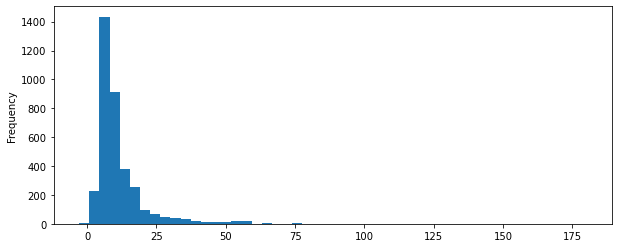

In [182]:
df['amount'].plot.hist(bins=50,figsize=(10,4))

<AxesSubplot:ylabel='Density'>

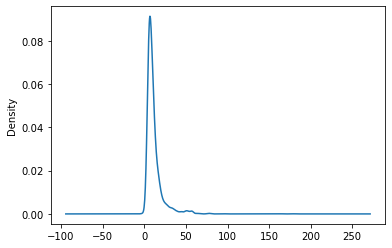

In [183]:
df['amount'].plot.density()

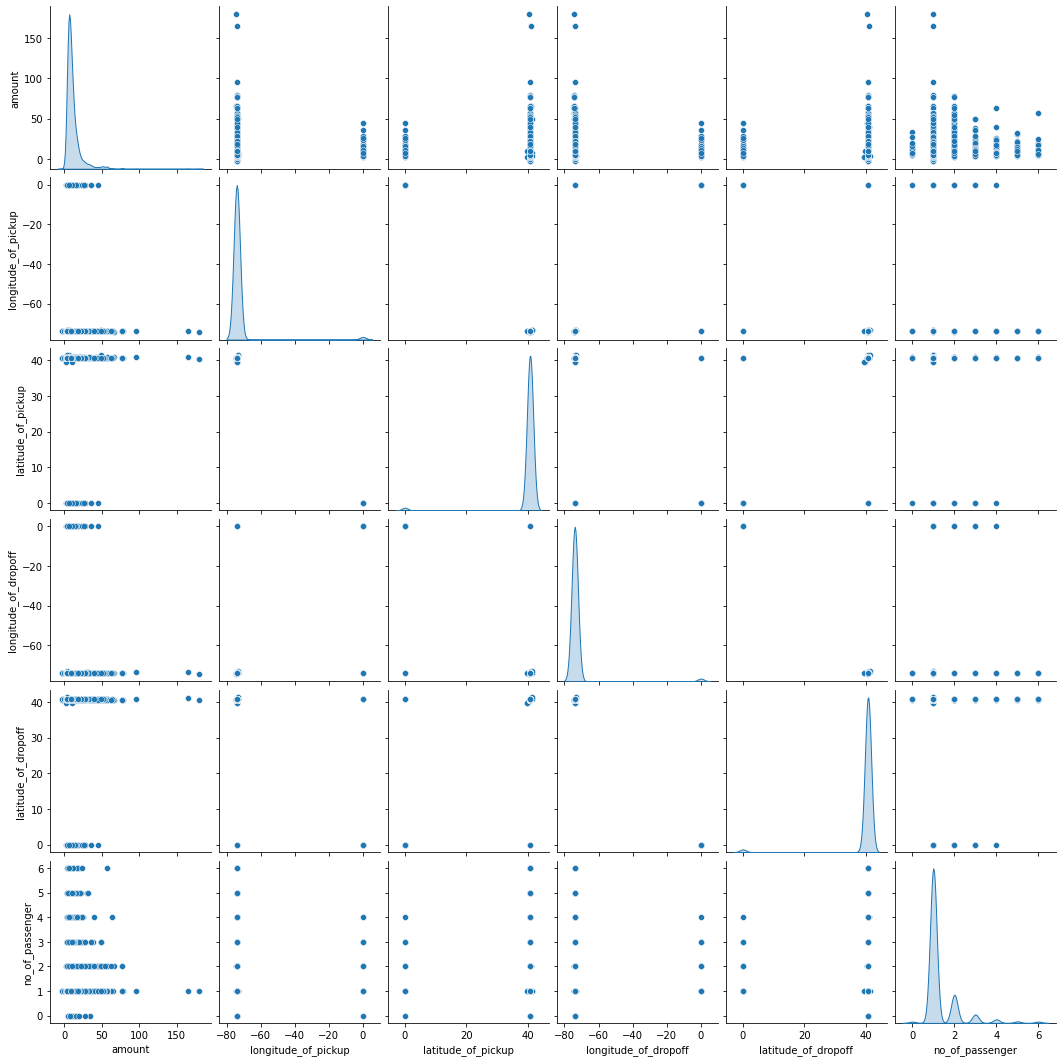

In [125]:
sns.pairplot(df,diag_kind='kde')

### Correlation Matrix and heatmap

In [184]:
corr=df.corr()
corr

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
amount,1.000000,0.005032,-0.004308,-0.000384,0.000357,0.029914
longitude_of_pickup,0.005032,1.000000,-0.999949,0.966635,-0.966585,-0.023099
latitude_of_pickup,-0.004308,-0.999949,1.000000,-0.966623,0.966631,0.022781
longitude_of_dropoff,-0.000384,0.966635,-0.966623,1.000000,-0.999953,-0.020386
latitude_of_dropoff,0.000357,-0.966585,0.966631,-0.999953,1.000000,0.020372
no_of_passenger,0.029914,-0.023099,0.022781,-0.020386,0.020372,1.000000


<AxesSubplot:>

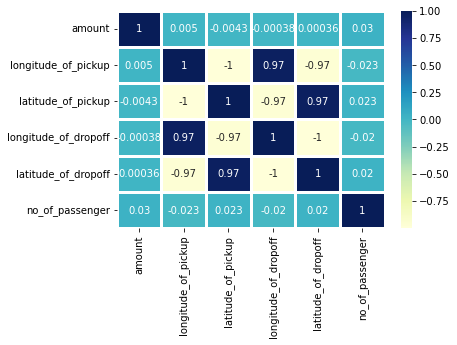

In [185]:
sns.heatmap(corr,annot=True,linewidths=3,cmap='YlGnBu')

<AxesSubplot:xlabel='no_of_passenger', ylabel='amount'>

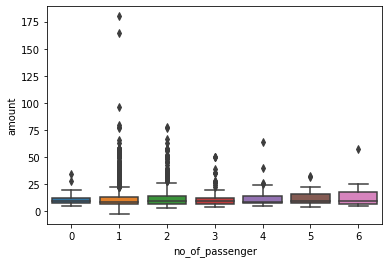

In [186]:
sns.boxplot(x='no_of_passenger',y='amount',data=df)

In [187]:
df['no_of_passenger'].value_counts()

1    2795
2     510
3     153
4      64
5      28
6      24
0      23
Name: no_of_passenger, dtype: int64

In [188]:
median1 = df['no_of_passenger'].median()
median1

1.0

In [189]:
df['no_of_passenger'].replace(0,median1,inplace=True)

In [190]:
df['no_of_passenger'].value_counts()

1    2818
2     510
3     153
4      64
5      28
6      24
Name: no_of_passenger, dtype: int64

In [191]:
df.drop('date_time_of_pickup',axis=1, inplace = True)

In [192]:
df.dtypes

unique_id                object
amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [193]:
df.drop('unique_id',axis=1, inplace = True)

In [194]:
df['amount'].value_counts()

 6.50      169
 4.50      142
 8.50      128
 5.30       99
 5.70       98
 7.00       92
 8.00       91
 4.90       91
 6.90       88
 6.10       88
 10.50      87
 8.10       86
 5.00       84
 7.70       82
 6.00       82
 5.50       72
 7.30       71
 4.10       69
 7.50       66
 9.00       65
 12.50      63
 9.50       59
 11.00      54
 9.30       54
 11.50      54
 9.70       53
 8.90       52
 3.70       48
 10.10      47
 10.00      45
 10.90      44
 16.50      40
 11.30      37
 12.00      37
 14.50      35
 4.00       34
 12.90      32
 12.10      31
 11.70      31
 18.50      26
 13.00      26
 13.50      24
 15.50      23
 3.30       23
 16.10      23
 13.70      23
 14.00      22
 17.00      21
 3.50       20
 13.30      20
 16.00      19
 15.00      19
 14.10      18
 2.50       16
 19.00      14
 20.50      14
 57.33      14
 18.00      14
 16.90      13
 15.70      12
 17.50      12
 15.30      11
 21.50      11
 19.50      11
 14.90      11
 52.00      10
 18.10    

In [137]:
df =df[df['amount']>=0]

In [138]:
df['longitude_of_pickup'].value_counts()

 0.000000     61
-73.990909     3
-73.967178     3
-73.137393     3
-73.988883     3
-73.994279     3
-73.975707     3
-73.990209     2
-73.972978     2
-73.992131     2
-73.976183     2
-73.980209     2
-73.976554     2
-73.885276     2
-73.982269     2
-73.991109     2
-73.984556     2
-73.983783     2
-73.994380     2
-73.873054     2
-73.991983     2
-73.991315     2
-73.982229     2
-74.005771     2
-73.981439     2
-73.870854     2
-73.986524     2
-74.006421     2
-73.998082     2
-73.985717     2
-73.975120     2
-73.977208     2
-73.956240     2
-74.004639     2
-73.976896     2
-73.984900     2
-73.989720     2
-73.974291     2
-73.982412     2
-73.970330     2
-74.006226     2
-73.990112     2
-73.982418     2
-73.988809     2
-74.005470     2
-73.978120     2
-73.993656     2
-73.979952     2
-73.977092     2
-73.990043     2
-73.990482     2
-73.978798     2
-73.995653     2
-74.007455     2
-73.992214     2
-73.980104     2
-73.978894     2
-73.978228     2
-74.005530    

In [139]:
df['latitude_of_pickup'].value_counts()

0.000000     61
41.366138     3
40.754311     2
40.764536     2
40.758641     2
40.768200     2
40.748065     2
40.758476     2
40.736140     2
40.766498     2
40.764702     2
40.761300     2
40.758480     2
40.763005     2
40.739582     2
40.645324     2
40.783716     2
40.748950     2
40.764120     2
40.779197     2
40.765964     2
40.715565     2
40.768364     2
40.750142     2
40.784274     2
40.765440     2
40.753719     2
40.740751     2
40.748285     2
40.742719     2
40.755204     2
40.762394     2
40.772643     2
40.719024     2
40.758877     2
40.718803     2
40.733101     2
40.760058     2
40.732371     2
40.738821     2
40.771313     2
40.769132     2
40.725900     2
40.742165     2
40.748288     2
40.775009     2
40.761807     2
40.752603     2
40.773760     2
40.760160     2
40.738510     2
40.742012     2
40.738625     2
40.761844     2
40.719869     2
40.759881     2
40.740880     2
40.763180     2
40.768633     2
40.753650     2
40.781000     2
40.742155     2
40.73720

In [195]:
df = df[(df['longitude_of_pickup'] != 0.0) & (df['latitude_of_pickup'] != 0.0)]

In [196]:
df.sample()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
5190,12.1,-73.99733,40.71929,-73.96953,40.757317,3


In [197]:
print(df.dtypes)

amount                  float64
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object


In [153]:
df.sample()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
501,6.5,-73.980695,40.742047,-73.97293,40.759006,1


In [154]:
#df=pd.get_dummies(df,columns=['no_of_passenger'])


,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger_1,no_of_passenger_2,no_of_passenger_3,no_of_passenger_4,no_of_passenger_5,no_of_passenger_6
127,8.0,-73.988492,40.717977,-73.97818,40.737407,1,0,0,0,0,0


### Put all the numerical features in X and Price in y

In [226]:
### split the data
y = df['amount']
x= df.drop(['amount'],axis=1)

In [227]:
### split into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=1)

In [228]:
### fit linear model
model1 = LinearRegression()

In [229]:
model1.fit(x_train,y_train)

LinearRegression()

In [230]:
model1.score(x_train,y_train)

0.06431788675793537

In [231]:
model1.score(x_test,y_test)

0.10774090994533281

In [232]:
y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: amount, dtype: float64

In [233]:
x.head()

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,-73.844311,40.721319,-73.841610,40.712278,1
1,-74.016048,40.711303,-73.979268,40.782004,1
2,-73.982738,40.761270,-73.991242,40.750562,2
3,-73.987130,40.733143,-73.991567,40.758092,1
4,-73.968095,40.768008,-73.956655,40.783762,1


# Model fit and training

In [234]:
from sklearn import metrics

In [235]:
lm = LinearRegression() # Creating a Linear Regression object 'lm'

In [237]:
lm.fit(x_train,y_train) # Fit the linear model

LinearRegression()

### Check the intercept and coefficients and put them in a DataFrame

In [238]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: 6342.921456997648


In [239]:
print("The coefficients of the linear model:", lm.coef_)

The coefficients of the linear model: [ 66.41262471 -34.95849424  -8.23841395 -14.8109235    0.16203922]


In [241]:
train_pred = lm.predict(x_train)

In [242]:
metrics.mean_squared_error(y_train,train_pred)

107.32244143398961

In [244]:
test_pred = lm.predict(x_test)

In [245]:
metrics.mean_squared_error(y_test,test_pred)

75.62945627729714

In [246]:
metrics.mean_absolute_error(y_train,train_pred)

5.841133722994886

In [247]:
np.sqrt(metrics.mean_squared_error(y_train,train_pred))

10.35965450360144

### Prediction using the lm model

In [249]:
predictions = lm.predict(x_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (1415,)


### Regression evaluation metrices for test

In [250]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean absolute error (MAE): 5.636944926972974
Mean square error (MSE): 75.62945627729714
Root mean square error (RMSE): 8.696519779618576


### R-square value

In [251]:
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

R-squared value of predictions: 0.108
